# 시각화 도구 Plotter
- 작성자: 고려대학교 경제학과 한치록 교수, 데이터사이언스팀 이창훈 과장

`bok_da` 라이브러리에 간편하게 그림을 그리는 모듈을 제공한다. 복수의 그림을 그릴 때 크게 2가지 인터페이스를 사용한다.

* list 인터페이스: `pp.line(x, [y1, y2, y3], label=["label 1", None, "label 3"])`
* list 인터페이스(간단 버전): `pp.line(x, y1, y2, y3, label=["label 1", None, "label 3"])`
* tuple 인터페이스: `pp.line(x, (y1,"label 1"), y2, (y3, "label 3"))`

다음의 표준적인 인터페이스도 제공한다.

* `pp.plot(x, y, label="label 1")`

라벨이 없으면 다음과 같이 한다.

* `pp.plot(x, y1, y2, y3)`
* `pp.plot(x, [y1, y2, y3])`

`bok_da` 라이브러리를 호출하고, 시각화도구 패키지(`viz`)에서 한국은행 스냅샷 스타일로 그림을 그릴 수 있는 `Plotter` 클래스를 불러온다.
- pp = Plotter()와 같은 방식으로 사용할 수 있다.

In [1]:
import pandas as pd
import numpy as np
import bok_da.viz as bdz
from bok_da.viz import Plotter

In [2]:
# 한글 폰트 설정과 마이너스 표시 오류 수정
bdz.setup_hangul_font()

> Initiating Hangul font setup for Graphs...
> Font set to 'Malgun Gothic' and unicode_minus=False.


## 1. 단일 스케일 복수 선그림

[한국은행 기준금리 및 여수신금리](https://snapshot.bok.or.kr/dashboard/A1)

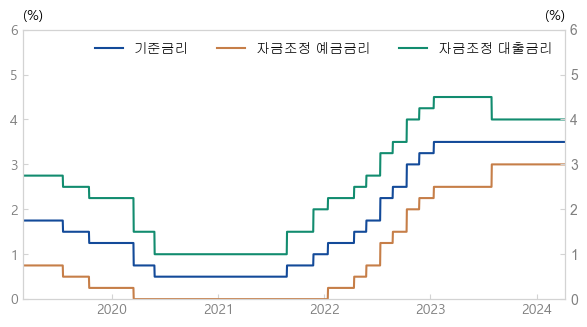

In [4]:
# Data
df = pd.read_excel('../data/한국은행 기준금리 및 여수신금리.xlsx', skiprows=6)
df.columns = ['x', 'y1', 'y2', 'y3']
df['x'] = pd.to_datetime(df.x)
df = df[df.x >= '2019-03-01']

# Plot
pp = Plotter(xmargin=0)
pp.set_ylim([0,6])
#pp.line(df.x, (df.y1, '기준금리'), (df.y2, '자금조정 예금금리'), (df.y3, '자금조정 대출금리'))
pp.line(df.x, [df.y1, df.y2, df.y3], label=['기준금리', '자금조정 예금금리', '자금조정 대출금리'])
pp.set_xaxis('year')
pp.set_yaxis('integer')
pp.annotate('(%)')
pp.legend()
#pp.export('plot01.pdf')

## 2. 수평선 추가

[장단기 금리 스프레드](https://snapshot.bok.or.kr/dashboard/A2)

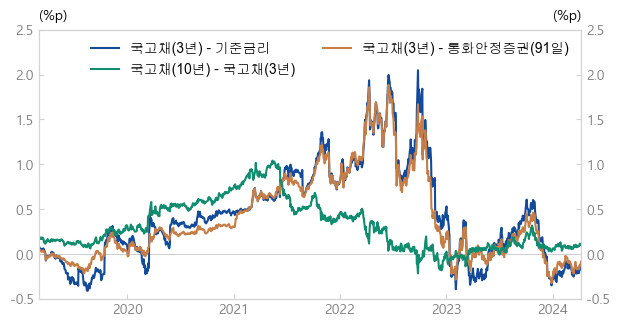

In [5]:
# Data
df = pd.read_excel('../data/장단기 금리 스프레드.xlsx', skiprows=6)
df.columns = ['x','y1','y2','y3']
df['x'] = pd.to_datetime(df.x)
df = df[df.x >= '2019-03-01']

# Plot
pp = Plotter(xmargin=0)
pp.abline(h=0, linewidth=0.5, color=pp.gray)
labs = ['국고채(3년) - 기준금리', '국고채(3년) - 통화안정증권(91일)', '국고채(10년) - 국고채(3년)']
#pp.line(df.x, [df.y1, df.y2, df.y3], label=labs)
pp.line(df.x, (df.y1, labs[0]), (df.y2, labs[1]), (df.y3, labs[2]))
pp.set_ylim([-0.5,2.5])
pp.set_xaxis('year')
pp.annotate('(%p)')
pp.legend(ncol=2)
#pp.export('plot02.pdf')

## 3. 좌우 양축

[코스피 및 코스닥 지수](https://snapshot.bok.or.kr/dashboard/A3)

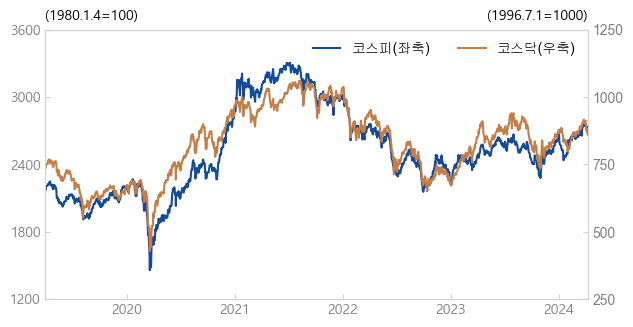

In [6]:
# Data
df = pd.read_excel('../data/코스피 및 코스닥 지수.xlsx', skiprows=6)
df.columns = ['x','y1','y2']
df['x'] = pd.to_datetime(df.x)
df = df[df.x >= '2019-04-01']

# Plot
pp = Plotter(xmargin=0)
pp.line(df.x, df.y1, label='코스피(좌축)')
pp.line(df.x, df.y2, label='코스닥(우축)', axis=1)
pp.set_yaxis(multiple=600, axis=0, lim=[1200,3600])
pp.set_yaxis(multiple=250, axis=1, lim=[250,1250])
pp.annotate(['(1980.1.4=100)', '(1996.7.1=1000)'])
pp.legend()
pp.show()

## 4. 선그림과 영역그림

[코스피 지수 및 거래량](https://snapshot.bok.or.kr/dashboard/A3)

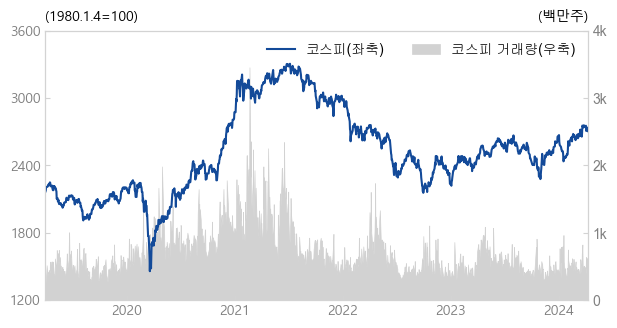

In [7]:
# Data
df = pd.read_excel('../data/코스피 지수 및 거래량.xlsx', skiprows=6)
df.columns = ['x','y1','y2']
df['x'] = pd.to_datetime(df.x)
df = df[df.x >= '2019-04-01']
df2 = df[df.y2.notnull()]

# Plot
pp = Plotter(xmargin=0, xtick_color='gray')
pp.line(df.x, df.y1, label='코스피(좌축)')
pp.fill_between(df2.x, df2.y2, axis=1, label='코스피 거래량(우축)', linewidth=.5, color=pp.gray, bright=1.5)
pp.to_front(0)
pp.annotate(['(1980.1.4=100)', '(백만주)'])
pp.set_xaxis('year')
pp.set_yaxis(multiple=600, axis=0, lim=[1200,3600])
pp.set_yaxis(multiple=1000, axis=1, thousand='k', lim=[0,4000])
pp.legend()
pp.show()

## 5. 선그림과 막대그림(분기)

[GDP 민간소비](https://snapshot.bok.or.kr/dashboard/C2)

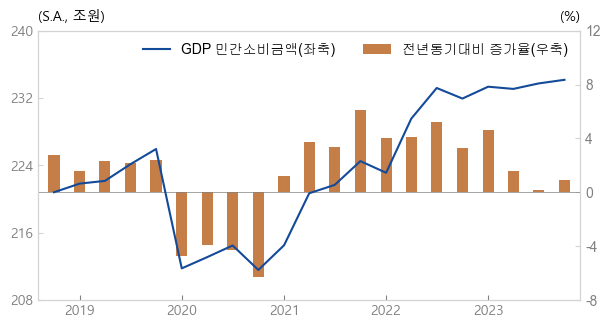

In [8]:
# Data
df = pd.read_excel('../data/GDP 민간소비.xlsx', skiprows=6)
df.columns = ['x','y1','y2']
df['x'] = pd.PeriodIndex(df.x, freq='Q').to_timestamp()
df = df[df.x >= pd.Period('2018Q4').to_timestamp()]

# Plot
pp = Plotter(xmargin=0.02)
pp.line(df.x, df.y1, label='GDP 민간소비금액(좌축)')
pp.abline(h=0, linewidth=.5, color='gray', axis=1)
pp.bar(df.x, df.y2, label='전년동기대비 증가율(우축)', width=40, axis=1)
pp.set_yaxis(lim=[208,240], axis=0, multiple=8)
pp.set_yaxis(lim=[-8,12], axis=1, multiple=4)
pp.to_front(0)
pp.annotate(['(S.A., 조원)', '(%)'])
pp.legend()
pp.show()

## 6. 선그림과 막대그림(월)

[국고채 발행잔액과 발행액](https://snapshot.bok.or.kr/dashboard/A2)

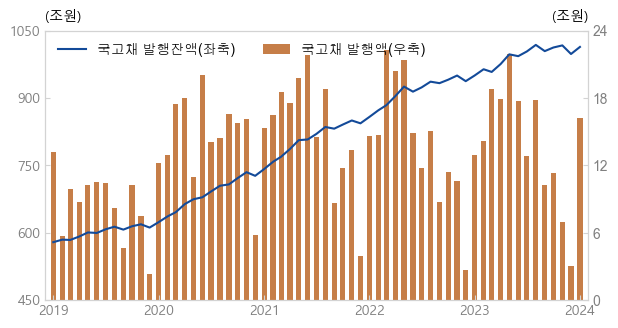

In [9]:
# Data
df = pd.read_excel('../data/국고채 발행잔액과 발행액.xlsx', skiprows=6)
df.columns = ['x','y1','y2']
df['x'] = pd.to_datetime(df.x, format='%Y-%m')
df = df[df.x >= '2019-01']

# Plot
pp = Plotter(xmargin=0.01)
pp.line(df.x, df.y1, label='국고채 발행잔액(좌축)')
pp.bar(df.x, df.y2, axis=1, label='국고채 발행액(우축)', width=18)
pp.set_yaxis(lim=[450,1050], axis=0, multiple=150)
pp.set_yaxis(lim=[0,24], axis=1, multiple=6)
pp.to_front(0)
pp.annotate('(조원)')
pp.legend()

## 7. 선그림과 병렬 막대그림

[주식거래대금 및 투자자예탁금](https://snapshot.bok.or.kr/dashboard/A3)

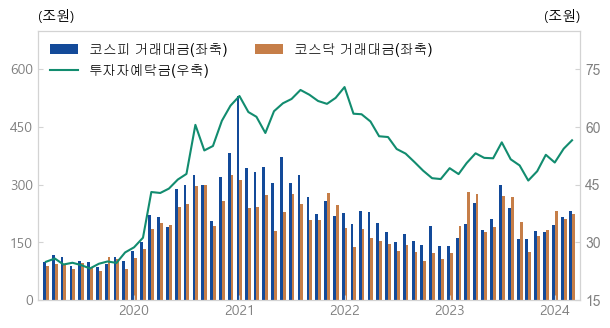

In [10]:
# Data
df = pd.read_excel('../data/주식거래대금 및 투자자예탁금.xlsx', skiprows=6)
df.columns = ['x','y1','y2','y3']
df['x'] = pd.to_datetime(df.x, format='%Y-%m')
df = df[df.x >= '2019-03']

# Plot
pp = Plotter(xmargin=0.01)
pp.bar(df.x, (df.y1, '코스피 거래대금(좌축)'), (df.y2, '코스닥 거래대금(좌축)'), width=10)
#pp.bar(df.x, [df.y1, df.y2], label=['코스피 거래대금(좌축)', '코스닥 거래대금(좌축)'], width=10)
pp.line(df.x, df.y3, axis=1, label='투자자예탁금(우축)')
pp.set_yaxis(lim=[0,700], multiple=150, axis=0)
pp.set_yaxis(lim=[15,85], multiple=15, axis=1)
pp.annotate('(조원)')
pp.legend(loc=2, ncol=2)
pp.show()

## 8. 복수 선그림과 막대그림

[예금은행 여수신 금리](https://snapshot.bok.or.kr/dashboard/A4)

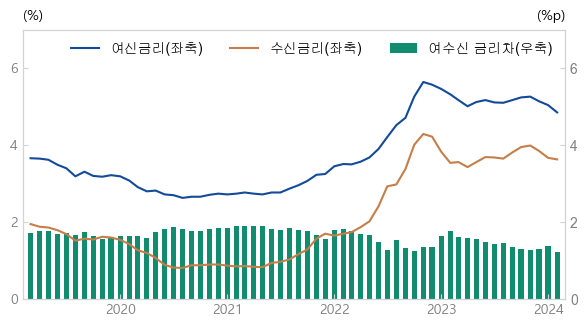

In [11]:
# Data
df = pd.read_excel('../data/예금은행 여수신 금리.xlsx', skiprows=6)
df.columns = ['x','y1','y2','y3']
df['x'] = pd.to_datetime(df.x, format='%Y-%m')
df = df[df.x >= '2019-03']

# Plot
pp = Plotter(xmargin=0.01)
pp.line(df.x, df.y1, label='여신금리(좌축)')
pp.line(df.x, df.y2, label='수신금리(좌축)')
pp.bar(df.x, df.y3, label='여수신 금리차(우축)', axis=1, width=18)
pp.set_yaxis(lim=[0,7], multiple=2)
pp.annotate(['(%)', '(%p)'])
pp.to_front(0)
pp.legend()
pp.show()

## 9. 누적영역그림과 해당 선그림

[비은행금융기관 기관별 수신](https://snapshot.bok.or.kr/dashboard/A4)

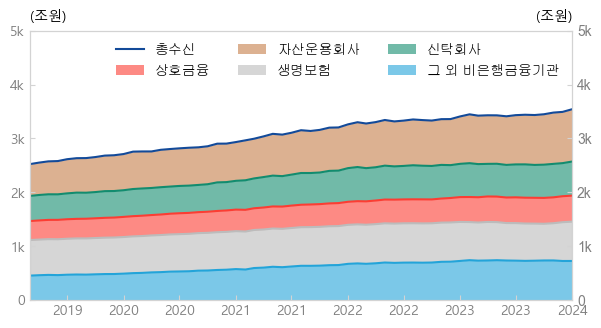

In [12]:
# Data
df = pd.read_excel('../data/비은행금융기관 기관별 수신.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]
df['x'] = pd.to_datetime(df.x)
df = df[df.x >= '2019-03-01']

# Plot
pp = Plotter(xmargin=0.0)
labs = ['자산운용회사', '신탁회사', '상호금융', '생명보험', '그 외 비은행금융기관']
pp.line(df.x, df.y1, label='총수신', zorder=2)
pp.cu_fill_between(df.x, [df.y2, df.y3, df.y4, df.y5, df.y6], linewidth=0, alpha=.6, label=labs)
pp.set_color(2)
pp.cu_line(df.x, [df.y3, df.y4, df.y5, df.y6])
pp.set_xaxis('year')
pp.set_yaxis(lim=[0,5000], multiple=1000, thousand='k')
pp.annotate('(조원)')
pp.legend()
pp.show()

## 10. 병렬 막대그림

[가계대출 및 판매신용 증감액](https://snapshot.bok.or.kr/dashboard/A4)

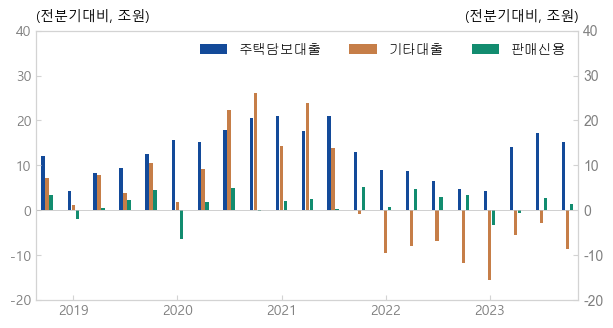

In [13]:
# Data
df = pd.read_excel('../data/가계대출 및 판매신용 증감액.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]
df['x'] = pd.PeriodIndex(df.x, freq='Q').to_timestamp()
df = df[df.x >= '2018-10-01']

# Plot
pp = Plotter(xmargin=0.01)
pp.abline(h=0, color=pp.gray, linewidth=.5)
labs = ['주택담보대출', '기타대출', '판매신용']
pp.bar(df.x, [df.y1, df.y2, df.y3], label=labs, width=12, gap=2)
pp.set_yaxis(lim=[-20,40], multiple=10)
pp.annotate('(전분기대비, 조원)')
pp.legend()
pp.show()

## 11. 누적막대그림

[장단기 대외채권](https://snapshot.bok.or.kr/dashboard/B2)

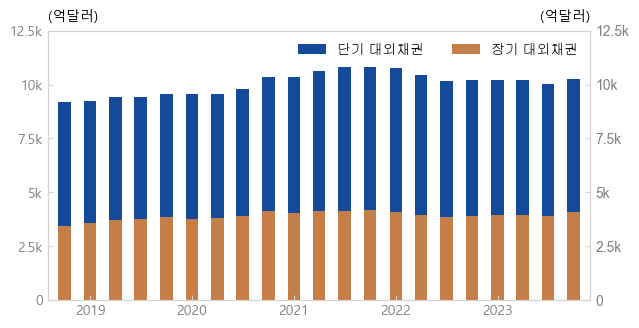

In [14]:
# Data
df = pd.read_excel('../data/장단기 대외채권.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]
df['x'] = pd.PeriodIndex(df.x, freq='Q').to_timestamp()
df = df[df.x >= '2018-10-01']

# Plot
pp = Plotter(xmargin=0.02)
pp.cu_bar(df.x, [df.y1, df.y2], label=['단기 대외채권', '장기 대외채권'], width=45)
pp.set_yaxis(lim=[0,12500], multiple=2500, thousand='k')
pp.annotate('(억달러)')
pp.legend()
pp.show()

## 12. 선그림과 누적막대그림

[대외채권 및 장단기 대외채무](https://snapshot.bok.or.kr/dashboard/B2)

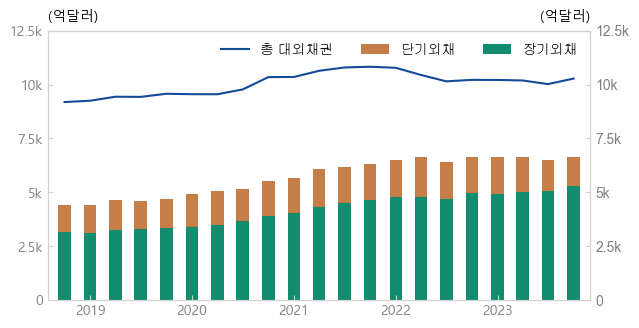

In [15]:
# Data
df = pd.read_excel('../data/대외채권 및 장단기 대외채무.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]
df['x'] = pd.PeriodIndex(df.x, freq='Q').to_timestamp()
df = df[df.x >= '2018-10-01']

# Plot
pp = Plotter(xmargin=0.02)
pp.line(df.x, df.y1, label='총 대외채권')
pp.cu_bar(df.x, [df.y2, df.y3], label=['단기외채', '장기외채'], width=45)
pp.set_yaxis(lim=[0,12500], multiple=2500, thousand='k')
pp.annotate('(억달러)')
pp.legend()
pp.show()

## 13. 누적막대그림(양수, 음수)

[장단기 순대외채권](https://snapshot.bok.or.kr/dashboard/B2)

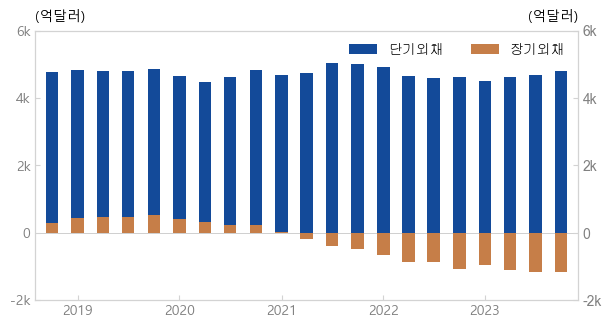

In [16]:
# Data
df = pd.read_excel('../data/장단기 순대외채권.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]
df['x'] = pd.PeriodIndex(df.x, freq='Q').to_timestamp()
df = df[df.x >= '2018-10-01']

# Plot
pp = Plotter(xmargin=0.02)
pp.cu_bar(df.x, [df.y1, df.y2], label=['단기외채', '장기외채'], width=45, zorder=1)
pp.abline(h=0, linewidth=.5, color=pp.gray, zorder=0)
pp.set_yaxis(lim=[-2000,6000], multiple=2000, thousand='k')
pp.annotate('(억달러)')
pp.legend()
pp.show()

## 14. 음영 배경에 선과 점그림에 숫자

[경제성장률 전망경로](https://snapshot.bok.or.kr/dashboard/C10)

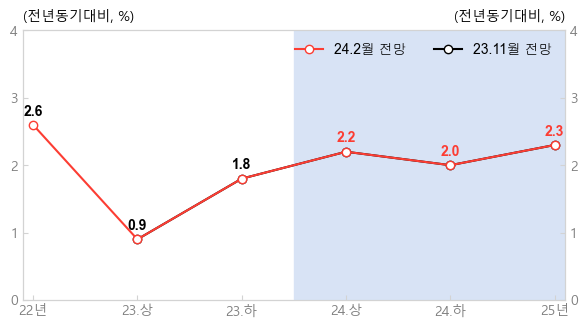

In [17]:
# Data
df = pd.read_excel('../data/경제성장률 전망경로.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]

# Plot
pp = Plotter()
pp.fill('x', 2.5, 5.1, color=pp.bgcolor)
pp.line(df.x, df.y1, color=pp.red, marker='o', markerfacecolor='white', label='24.2월 전망', zorder=2)
pp.line(df.x, df.y2, color=pp.black, marker='o', markerfacecolor='white', label='23.11월 전망', zorder=1)
pp.text(df.x[:3], df.y1[:3], vadj=.1, color=pp.black, fontweight='bold')
pp.text(df.x[3:], df.y1[3:], vadj=.1, color=pp.red, fontweight='bold')
pp.annotate('(전년동기대비, %)')
pp.set_xlim([-.1, 5.1])
pp.set_yaxis('integer', lim=[0,4])
pp.legend()
pp.show()

## 15. 배경음영에 선그림, 숫자, 누적막대그림

[경상수지 전망경로](https://snapshot.bok.or.kr/dashboard/C10)

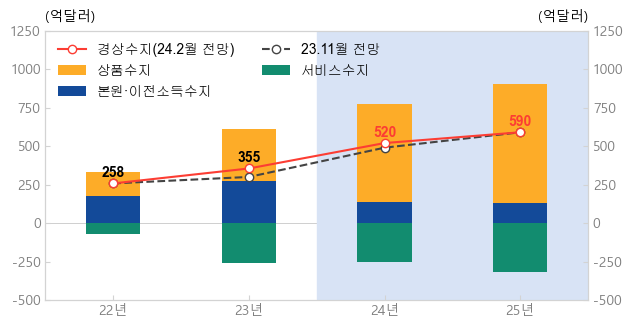

In [18]:
# Data
df = pd.read_excel('../data/경상수지 전망경로.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]

# Plot
pp = Plotter()
pp.fill('x', 1.5, 3.5, color=pp.bgcolor)
pp.line(df.x, df.y1, color=pp.red, marker='o', markerfacecolor='white', label='경상수지(24.2월 전망)', zorder=3)
pp.line(df.x, df.y2, color='#444444', linestyle='--', marker='o', markerfacecolor='white', label='23.11월 전망', zorder=2)
pp.cu_bar(df.x, [df.y3, df.y4, df.y5], label=['상품수지', '서비스수지', '본원·이전소득수지'], zorder=1, width=.4,
          color=[pp.yellow, pp.green, pp.blue])
pp.abline(h=0, color=pp.gray, linewidth=.5, zorder=0)
pp.text(df.x[:2], df.y1[:2], vadj=25, color=pp.black, fontweight='bold')
pp.text(df.x[2:], df.y1[2:], vadj=25, color=pp.red, fontweight='bold')
pp.annotate('(억달러)')
pp.set_xlim([-.5, 3.5])
pp.set_yaxis(lim=[-500,1250], multiple=250)
pp.legend(loc=2, ncol=2)
pp.show()

## 16. 부호가 복잡한 누적막대그림

[경상수지](https://snapshot.bok.or.kr/dashboard/C4)

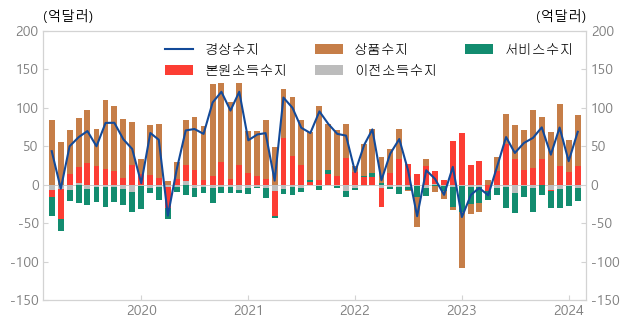

In [19]:
# Data
df = pd.read_excel('../data/경상수지.xlsx', skiprows=6)
df.columns = ['x'] + [f'y{i}' for i in range(1,df.shape[1])]
df['x'] = pd.to_datetime(df.x, format='%Y-%m')
df = df[df.x >= '2019-03']

# Plot
pp = Plotter(xmargin=.01)
pp.line(df.x, df.y1, label='경상수지', zorder=2)
pp.cu_bar(
    df.x, [df.y2, df.y3, df.y4, df.y5],
    label=['상품수지', '서비스수지', '본원소득수지', '이전소득수지'],
    zorder=1, width=20
)
pp.abline(h=0, color=pp.gray, linewidth=.5, zorder=0)
pp.annotate('(억달러)')
pp.set_yaxis(lim=[-150,200], multiple=50)
pp.legend(ncol=3)
pp.show()

## 17. 경기순환 배경 음영

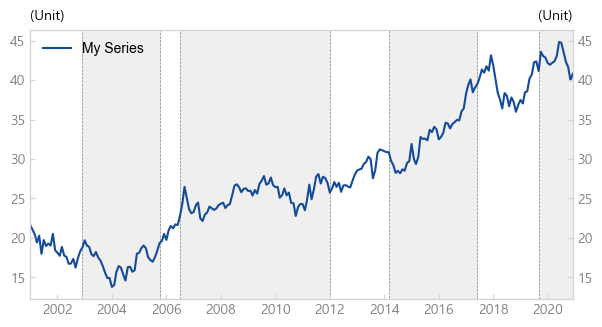

In [20]:
# Generate data
np.random.seed(1)
date_range = pd.date_range(start='2001-01-01', end='2020-12-01', freq='MS')
e = np.random.normal(size=date_range.shape[0])
df = pd.DataFrame({'month': date_range, 'y':20+e.cumsum()})

# begin (included), end (included), ...
gray = ['2002-12', '2005-10', '2006-07', '2012-01', '2014-03', '2017-06', '2019-09', '2020-12']
gray_dates = pd.to_datetime(gray)

# plot
bp = Plotter(xmargin=0)
bp.line(df.month, df.y, label='My Series', zorder=1)
bp.shadow_areas(gray_dates, facecolor='#efefef', edgecolor='gray', linestyle='dashed', linewidth=.5, zorder=0)
bp.annotate('(Unit)')
bp.legend(loc=2)
bp.show()